In [57]:
import numpy as np

In [3]:
import pyodbc
import pandas as pd

# Define the path to your ACCDB file
accdb_path =r'C:\Users\mohci\Desktop\Stage TiLTeR\TiLTer V4.accdb'


# Set up the connection to the ACCDB file
conn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    r'DBQ=' + accdb_path + ';'
)
conn = pyodbc.connect(conn_str)

# Query the table
query = 'SELECT * FROM POSTAN20'
data = pd.read_sql(query, conn)

# Close the connection


C:\Users\mohci\AppData\Local\Temp\ipykernel_23124\1079237686.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


In [2]:
data.head()

,AGE,SEXE,REGR,DEPR,ZEMPR,REGT,DEPT,ZEMPT,DOMEMPL,DOMEMPL_EMPL,...,TYPEMPLOI,AT,PCS,CS,CONT_TRAV,CONV_COLL,NBHEUR,EQTP,AGE_TR,Champ30
0,60.0,2,75,33,7204,75.0,33.0,7204.0,2.0,2.0,...,O,1,621F,62.0,AUT,0.0,1820,None,"""[59","63[ ans"""
1,41.0,1,75,33,7204,75.0,33.0,7204.0,9.0,9.0,...,O,0.858,691E,69.0,TOA,1090.0,1584,0.87033,"""[39","43[ ans"""
2,30.0,1,75,47,7211,75.0,47.0,7209.0,9.0,9.0,...,O,0.5,373C,37.0,CDI,1483.0,840,0.46154,"""[27","31[ ans"""
3,32.0,1,75,47,7211,75.0,47.0,7211.0,9.0,9.0,...,O,1,632J,63.0,CDI,1596.0,1700,0.93407,"""[31","35[ ans"""
4,18.0,2,75,33,7204,75.0,17.0,5407.0,9.0,9.0,...,O,0.078,561B,56.0,TOA,1979.0,140,0.07692,"""[15","19[ ans"""


In [53]:
atay='[COM]'
#atay2='[P20_NSCOL15P_SUP5]'
table='[Tiers lieux par commune]'
table2='[Table Centrale]'
query2= f'SELECT {atay} FROM {table2}'
data2 = pd.read_sql(query2,conn)

C:\Users\mohci\AppData\Local\Temp\ipykernel_20516\1984862596.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data2 = pd.read_sql(query2,conn)


In [54]:
type(data2['COM'][1])

numpy.float64

In [20]:
atay='[N TL]'
atay2='[P20_NSCOL15P_SUP5]'
table='[Tiers lieux par commune]'
table2='[Diplômes et Formation 2020]'
query2= f'SELECT {atay2} FROM {table2}'
data2 = pd.read_sql(query2,conn)
data2.head()

C:\Users\mohci\AppData\Local\Temp\ipykernel_20516\2720997832.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data2 = pd.read_sql(query2,conn)


,P20_NSCOL15P_SUP5
0,8.0
1,16.0
2,18.0
3,32.0
4,18.0


In [34]:
type(atay)

str

In [4]:
test1=pd.read_excel('test1.xlsx',index_col=0)
test1.head()

,Nom Commune,P20_NSCOL15P_SUP2,NTLBIN
COM,,,
16001,Abzac,32,0
16002,Adjots,39,0
16003,Agris,59,0
16005,Aigre,93,0
16007,Alloue,34,0


In [5]:
print(test1['NTLBIN'].corr(test1['P20_NSCOL15P_SUP2']))

0.3449656015187336


In [61]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




X_train, X_test, y_train, y_test = train_test_split(test1[['P20_NSCOL15P_SUP2']], test1['NTLBIN'], test_size=0.2, random_state=42)


model = LogisticRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9593967517401392


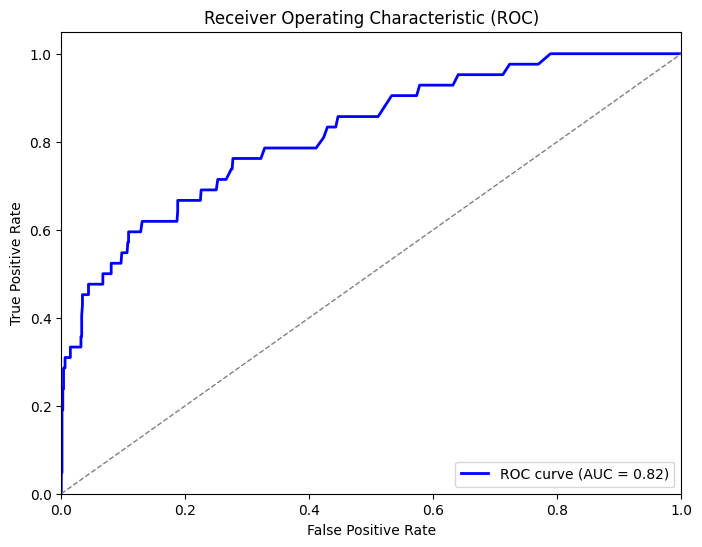

In [62]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt



X_train, X_test, y_train, y_test = train_test_split(test1[['P20_NSCOL15P_SUP2']], test1['NTLBIN'], test_size=0.2, random_state=42)


model = LogisticRegression()

# Entraînez le modèle sur l'ensemble d'apprentissage
model.fit(X_train, y_train)

# Prédisez les probabilités des classes pour l'ensemble de test
y_probs = model.predict_proba(X_test)[:, 1]

# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_roc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [63]:
from sklearn.metrics import f1_score

# Supposons que 'y_true' sont les vraies étiquettes et 'y_pred' sont les prédictions de votre modèle
# 'y_true' et 'y_pred' doivent être des tableaux NumPy ou des listes contenant les étiquettes vraies et les prédictions correspondantes

# Calcul du score F1
f1 = f1_score(y_test, y_pred)

print("F1 score:", f1)


F1 score: 0.33962264150943394
